### **Spam Classifier Using Naive Bayes**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/spam.csv")

In [ ]:
df.head(6)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...


In [ ]:
df.shape

(5572, 2)

#### **Data Cleaning**

In [ ]:
df.isnull().sum() #checking for null

Category    0
Message     0
dtype: int64

In [ ]:
df.duplicated().sum() #checking for duplicates

415

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(5157, 2)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

In [ ]:
df['Category']= encoder.fit_transform(df['Category']) #coverting spam ham into 1 and 0

In [ ]:
df.head(6 )

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...


In [ ]:
df['Category'].value_counts() #checking how many msgs are ham and spam

0    4516
1     641
Name: Category, dtype: int64

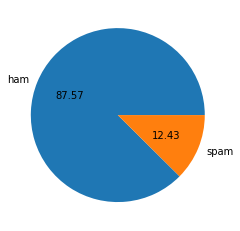

In [ ]:
import matplotlib.pyplot as plt
plt.pie (df['Category'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

#### **Data Preprocessing**


In [ ]:
import nltk
!pip install nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
# stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import string
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()
# ps.stem("dancing")

In [ ]:
def process_messages(message):
  message= message.lower()  #making msg in lower case
  message= nltk.word_tokenize(message)  #seperating words

  y=[]
  for m in message: #removing special characters
    if m.isalnum():
      y.append(m) 

  message= y[:]
  y.clear()

  for m in message:  #removing stopwords: words that are meaningless
    if m not in  stopwords.words('english') and m not in string.punctuation:
      y.append(m)

  message=y[:]
  y.clear()

  for m in message:
    y.append(ps.stem(m)) #gives root form of words

  return " ".join(y)  

In [ ]:
df['Message'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
process_messages('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point avail bugi n great world la e buffet cine got amor wat'

In [ ]:
df['processed_message']= df['Message'].apply(process_messages)

In [ ]:
df.head()

,Category,Message,processed_message
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')


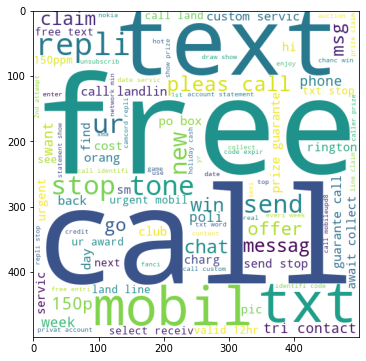

In [ ]:
spam_wc = wc.generate(df[df['Category'] == 1]['processed_message'].str.cat(sep=" "))
plt.figure(figsize=(10,6))
plt.imshow(spam_wc)

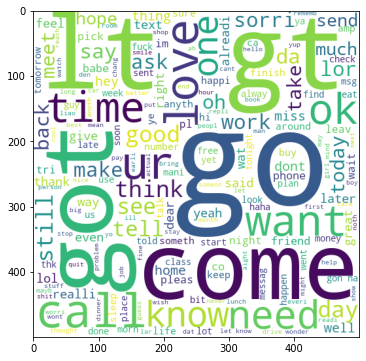

In [ ]:
ham_wc = wc.generate(df[df['Category'] == 0]['processed_message'].str.cat(sep=" "))
plt.figure(figsize=(10,6))
plt.imshow(spam_wc)

#### **Model Development**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=4000)

In [ ]:
x= tfidf.fit_transform(df['processed_message']).toarray()

In [ ]:
tfidf.transform

<bound method TfidfVectorizer.transform of TfidfVectorizer(max_features=4000)>

In [ ]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
x.shape

(5157, 4000)

In [ ]:
y= df['Category'].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,  MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gNB= GaussianNB()
mNB = MultinomialNB()
bNB = BernoulliNB()

In [ ]:
gNB.fit(x_train,y_train)
y_pred1 = gNB.predict(x_test)
print("Accuracy Score: ", format(accuracy_score(y_test,y_pred1),".2f"))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred1))
print("Precision Score: ",format(precision_score(y_test,y_pred1),".2f"))

Accuracy Score:  0.86
Confusion Matrix: 
 [[780 125]
 [ 16 111]]
Precision Score:  0.47


In [ ]:
mNB.fit(x_train,y_train)
y_pred2 = mNB.predict(x_test)
print("Accuracy Score: ", format(accuracy_score(y_test,y_pred2),".2f"))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred2))
print("Precision Score: ",format(precision_score(y_test,y_pred2),".2f"))

Accuracy Score:  0.97
Confusion Matrix: 
 [[905   0]
 [ 33  94]]
Precision Score:  1.00


In [ ]:
bNB.fit(x_train,y_train)
y_pred3 = bNB.predict(x_test)
print("Accuracy Score: ", format(accuracy_score(y_test,y_pred3),".2f"))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred3))
print("Precision Score: ",format(precision_score(y_test,y_pred3),".2f"))

Accuracy Score:  0.98
Confusion Matrix: 
 [[904   1]
 [ 22 105]]
Precision Score:  0.99


In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mNB,open('model.pkl','wb'))